In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [4]:
adult_df = pd.read_csv('adult.csv', header=None)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
                    'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                    'income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
categoricals = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
numericals = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [7]:
adult_df[categoricals].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


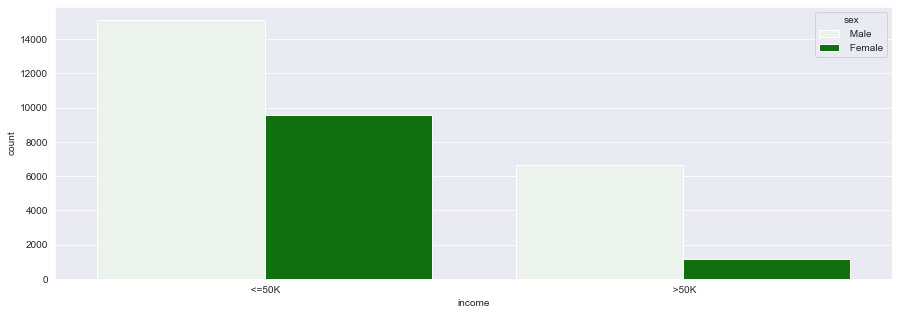

In [8]:
sns.countplot(x=adult_df['income'], hue='sex', data=adult_df, color = 'green')
plt.show()

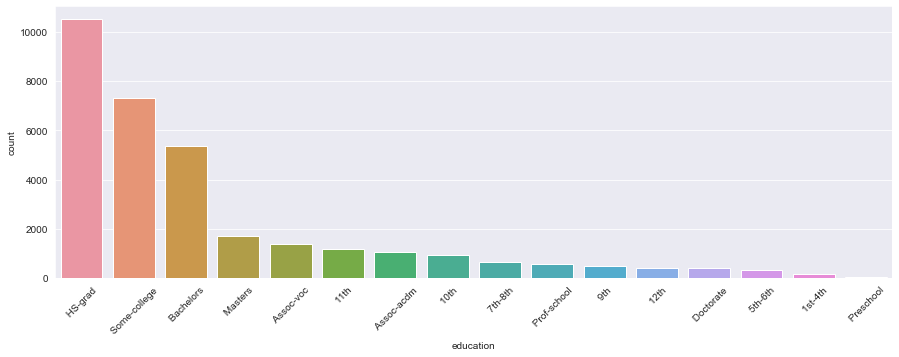

In [9]:
sns.countplot(x=adult_df['education'], order=adult_df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

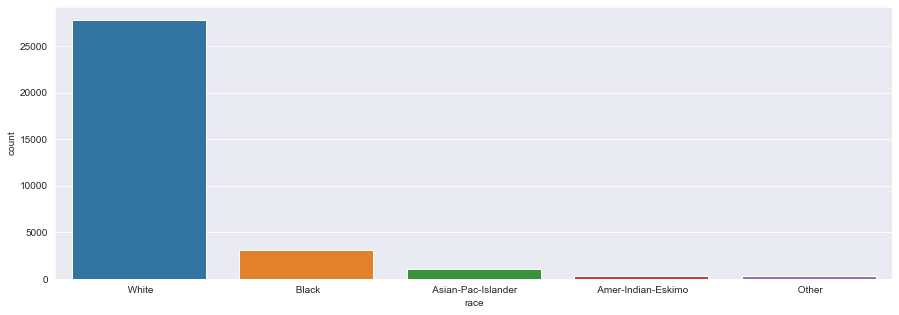

In [10]:
sns.countplot(x=adult_df['race'], data=adult_df)
plt.show()

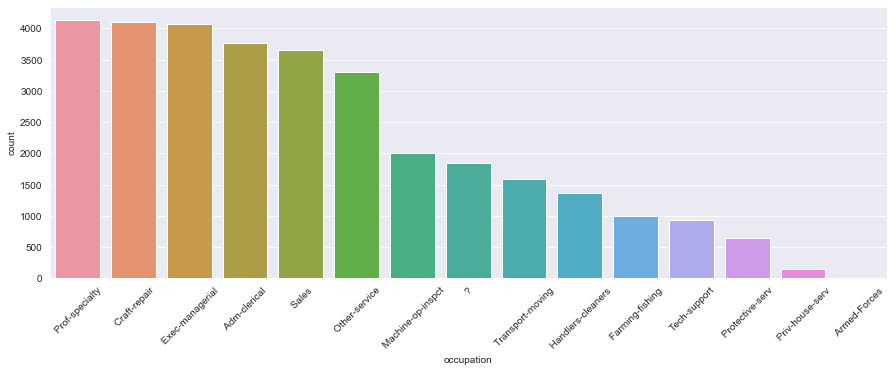

In [11]:
sns.countplot(x=adult_df['occupation'], data=adult_df, order=adult_df['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [12]:
adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.NaN)
adult_df['native_country'] = adult_df['native_country'].replace(' ?', np.NaN)

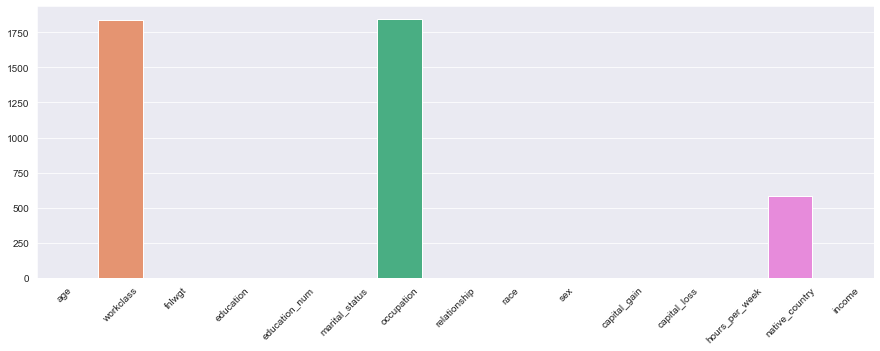

In [13]:
sns.barplot(x=adult_df.columns, y=adult_df.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

In [14]:
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [15]:
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')

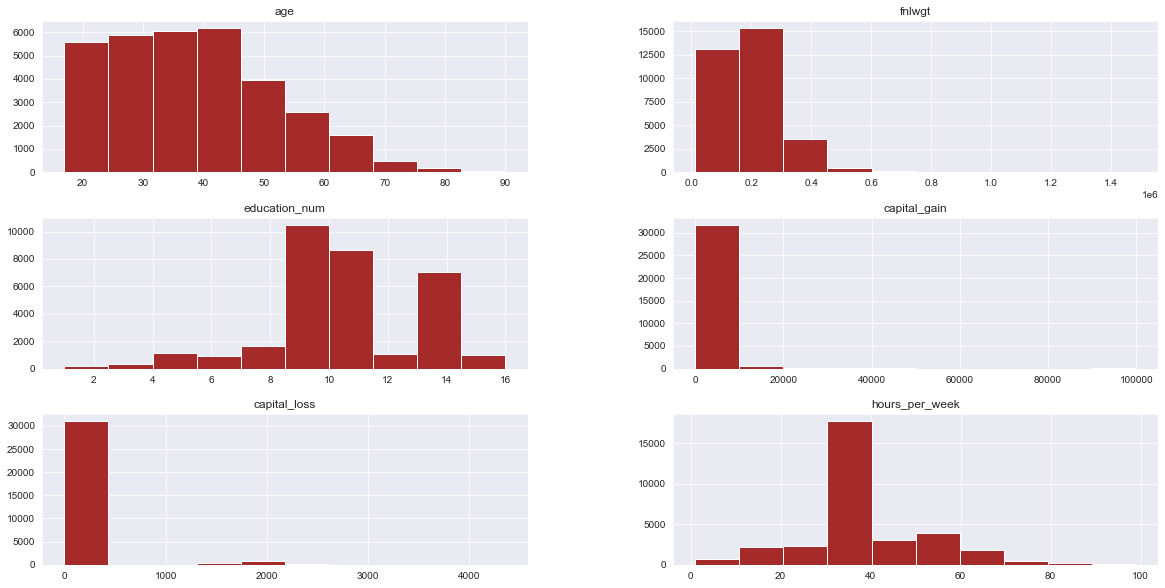

In [31]:
adult_df[numericals].hist(figsize=(20, 10), color = 'brown')
plt.show()

In [17]:
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace=True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace=True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace=True)

In [18]:
adult_df = pd.get_dummies(data=adult_df, columns=categoricals, drop_first=True)

In [19]:
adult_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.preprocessing import RobustScaler
X = adult_df.drop('income_ >50K', axis=1)
y = adult_df['income_ >50K']

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X[numericals])
X[numericals] = X_scaled

In [21]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred = gnb.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8231


In [26]:
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8253
Test set score: 0.8231


In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6321 1066]
 [ 662 1720]]

True Positives(TP) =  6321

True Negatives(TN) =  1720

False Positives(FP) =  1066

False Negatives(FN) =  662


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7387
           1       0.62      0.72      0.67      2382

    accuracy                           0.82      9769
   macro avg       0.76      0.79      0.77      9769
weighted avg       0.84      0.82      0.83      9769



In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.8245614  0.81754386 0.82799473 0.81483107 0.82053532 0.83282141
 0.81526986 0.82448442 0.83018868 0.83238262]

Average cross-validation score: 0.8241
